# Evolution of patents in the world

In [1]:
import pandas as pd

Patent authority where the application was filled

In [76]:
data = pd.read_csv("./../data/patents_per_country.csv", sep=";",
                  names=["country_short", "year", "n_patents"])[1:]

In [77]:
data.head()

,country_short,year,n_patents
1,DK,1967,3305.0
2,US,1939,44222.0
3,BG,1989,1360.0
4,VN,1999,1.0
5,SU,1911,6.0


In [78]:
country_codes = pd.read_csv("../data/country_codes.csv", sep=";")

In [79]:
country_codes.head()

,country,country_short
0,AFGHANISTAN,AF
1,ALBANIA,AL
2,ALGERIA,DZ
3,ANDORRA,AD
4,ANGOLA,AO


In [80]:
data = data.merge(country_codes, on='country_short')
data.year = pd.to_numeric(data.year)
data.n_patents = pd.to_numeric(data.n_patents)

In [81]:
data.head()

,country_short,year,n_patents,country
0,DK,1967,3305.0,DENMARK
1,DK,1961,2981.0,DENMARK
2,DK,1964,3243.0,DENMARK
3,DK,1970,2914.0,DENMARK
4,DK,1993,8453.0,DENMARK


In [182]:
data.n_patents.sum()

70414723.0

In [82]:
pd.DataFrame(data.groupby("country").n_patents.sum()).sort_values(by="n_patents", axis=0, ascending=False)

,n_patents
country,
JAPAN,15316682.0
UNITED STATES,14948130.0
GERMANY,5972070.0
CHINA,5968600.0
UNITED KINGDOM,3515530.0
CANADA,3234817.0
FRANCE,3166705.0
"KOREA, REPUBLIC OF",2992035.0
AUSTRALIA,1765441.0


In [101]:
sums = data.groupby(["country", "year"]).sum()

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from ipywidgets import *

In [180]:
def plot_per_country(ctry, start_year):
    df = pd.DataFrame(sums.loc[(ctry, )])
    df = df[df.index <= 2016]
    df = df[df.index >= start_year]
    plt.plot(df.index, df.n_patents);
    #display(HTML("<h3> Number of patents from that date : %s </h3>" % df.n_patents.sum()))
    print("# of patents from that date :", df.n_patents.sum())

# of patents from that date : 3188.0


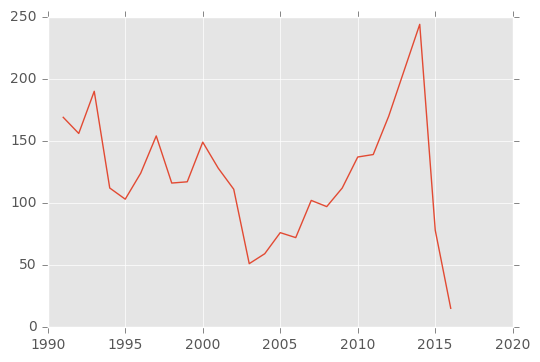

In [181]:
display(HTML("<h1> Patents number evolution per country </h1>"))
interact(plot_per_country, ctry=list(set([c for c,y in sums.index.values[::-1]])), 
         start_year=(1950,2016,1))

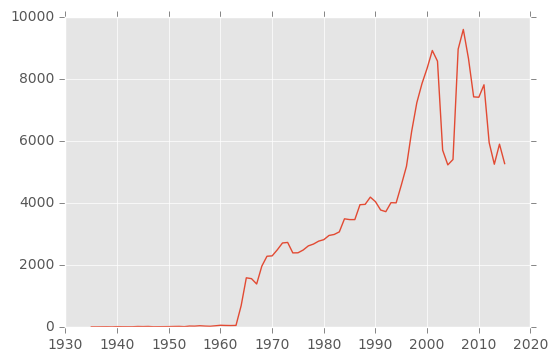

In [130]:
plot_per_country("ISRAEL")

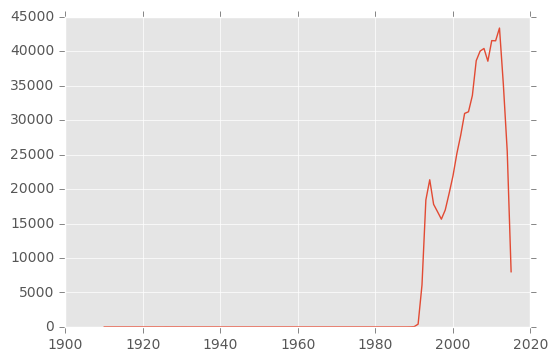

In [122]:
plot_per_country("")

In [95]:
swiss = pd.DataFrame(test.loc[("SWITZERLAND", )])

In [99]:
swiss = swiss[swiss.index < 2017]

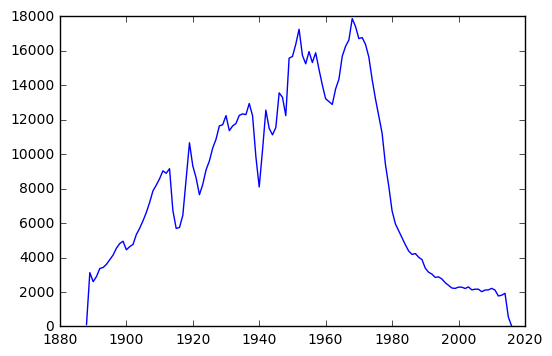

In [100]:
plt.plot(swiss.index, swiss.n_patents)